<a href="https://colab.research.google.com/github/TA-PP/SKT-FLY-AI/blob/main/FLY_Day16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 인공 신경만의 구조
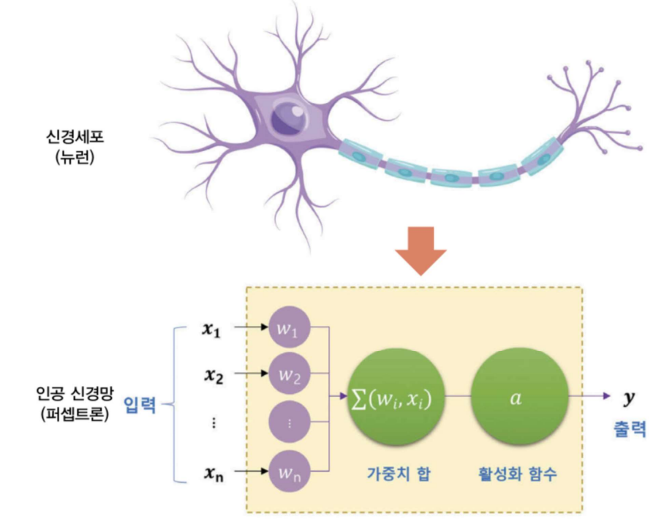

### 손실함수
인공 신경망이 출력하는 값과 실제 정답과의 차이
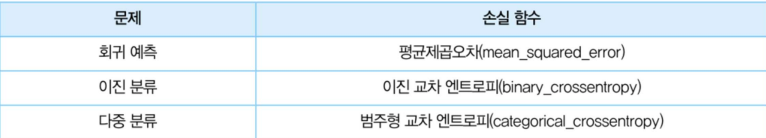

### 옵티마이저 (최적화 알고리즘)
손실함수를 최소화하는 방향으로 가중치를 갱신하는 알고리즘



### 인공 신경망의 구조 - 다층 신경망 (MLP : Multi Layer Perceptron)
인공 신경망은 일반적으로 여러 층의 레이어(층, layer)를 겹겹이 쌓아서 만든다. 입력 레이어와 출력 레이어가 신경망의 앞과 뒤에 위치하고, 그사이에 여러층의 은닉 레이어를 배치

각 레이어는 하나의 유닛으로 구성되고, 각 유닛은 하나의 파셉트론으로 이루어진다. 각 유닛은 입력값과 가중치를 갖고 활성화 함수를 거쳐 출력

인접한 두 레이어의 각 유신은 서로 가중치를 갖는 연결선을 통해 이어지고 일대일 대응 관계
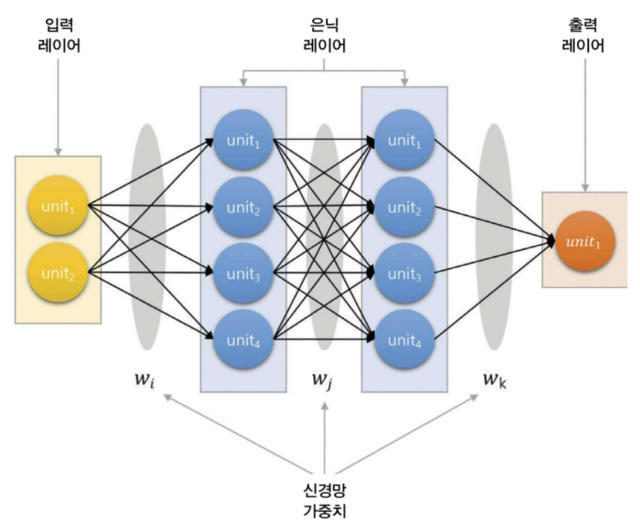

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

X_train = np.array(x).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


#### Sequential API
Sequential API는 레이어 여러 개를 연결하여 신경망 모델을 구성하는 도구이다. 간단한 아키 텍처를 가지면서 대부분의 딥러닝 모델을 만들 수 있다.

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#### 모델 학습 및 예측
fit 메소드에 훈련 데이터를 입력하여 모델을 학습시킨다. 에포트(epoch)는 전체 입력 데이터를 모두 몇 번 학습할 것인지 반복 횟수를 정한다. verbose 옵션을 False로 지정하면 훈련과정을 화면에 보여주지 않는다.

In [8]:
model.fit(X_train, y_train, epochs=3000, verbose=0)

In [10]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9999969]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.999955], dtype=float32)>]

In [9]:
model.predict([[11], [12], [13]])

1/1 [==============================] - 0s 74ms/step


array([[11.999921],
       [12.999918],
       [13.999915]], dtype=float32)

### 딥러닝을 활용한 회귀 분석 : 보스턴 주택 가격 예측

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
# 란덤 시드 고정

SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print('시드 고정:', SEED)

시드 고정: 12


In [7]:
# sklearn 데이터 셋에서 보스턴 주택 데이터 셋 로딩

from sklearn import datasets

housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target

print(X_data.shape, y_data.shape)

(506, 13) (506,)


In [8]:
# 피쳐 스케일링 : 0 ~ 1 사이의 값으로 만들어 준다.
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [11]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, shuffle=True, random_state=SEED)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [12]:
# 심층 신경망

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_input=1):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=num_input))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='relu'))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  return model

model = build_model(num_input=13)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


#### 미니 배치 학습
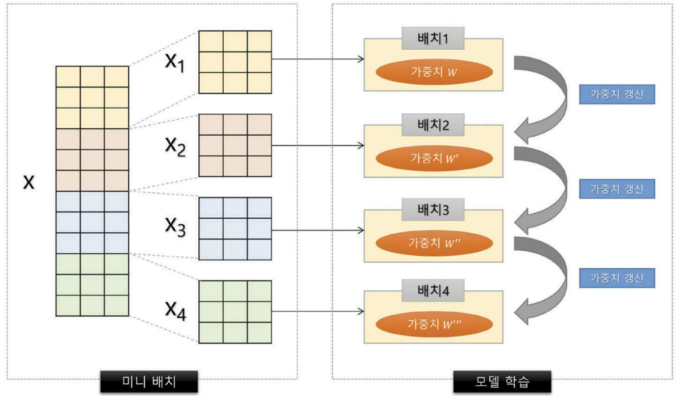
훈련 데이터의 샘플 수는 404개이므로 32개씩 묶으면 모두 13개의 미니 배치가 만들어진다.

In [13]:
# 모델 훈련

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 3s - loss: 90.4630 - mae: 7.0824 - 3s/epoch - 265ms/step
Epoch 2/100
13/13 - 0s - loss: 64.3057 - mae: 5.7455 - 29ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 64.3557 - mae: 5.6576 - 31ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 60.2640 - mae: 5.7532 - 28ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 57.6921 - mae: 5.5317 - 28ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 66.1233 - mae: 5.8193 - 29ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 60.7211 - mae: 5.9786 - 28ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 64.7685 - mae: 5.8230 - 30ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 49.8413 - mae: 4.9066 - 29ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 49.9456 - mae: 5.1856 - 28ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 52.5202 - mae: 5.2232 - 28ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 47.6920 - mae: 4.7989 - 28ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 52.9241 - mae: 5.4587 - 28ms/epoch - 2ms/

In [14]:
# 평가 

model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 22.1459 - mae: 3.4983


[22.1458740234375, 3.498304843902588]

In [15]:
# 교차 검증

model = build_model(num_input=13)

history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=2)

Epoch 1/200
10/10 - 1s - loss: 1237.3719 - mae: 25.6338 - val_loss: 181.5511 - val_mae: 11.0488 - 576ms/epoch - 58ms/step
Epoch 2/200
10/10 - 0s - loss: 172.1379 - mae: 10.3405 - val_loss: 103.0147 - val_mae: 7.0567 - 46ms/epoch - 5ms/step
Epoch 3/200
10/10 - 0s - loss: 88.4216 - mae: 6.7519 - val_loss: 60.3812 - val_mae: 6.2448 - 44ms/epoch - 4ms/step
Epoch 4/200
10/10 - 0s - loss: 76.1409 - mae: 6.6223 - val_loss: 59.9909 - val_mae: 5.6371 - 44ms/epoch - 4ms/step
Epoch 5/200
10/10 - 0s - loss: 73.7135 - mae: 6.1445 - val_loss: 59.6664 - val_mae: 5.9573 - 45ms/epoch - 5ms/step
Epoch 6/200
10/10 - 0s - loss: 73.0180 - mae: 6.0596 - val_loss: 59.0627 - val_mae: 5.3425 - 45ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 70.5498 - mae: 5.7274 - val_loss: 55.9221 - val_mae: 5.9796 - 45ms/epoch - 4ms/step
Epoch 8/200
10/10 - 0s - loss: 70.7240 - mae: 6.2167 - val_loss: 56.0704 - val_mae: 5.0453 - 48ms/epoch - 5ms/step
Epoch 9/200
10/10 - 0s - loss: 71.3924 - mae: 5.7011 - val_loss: 53.02

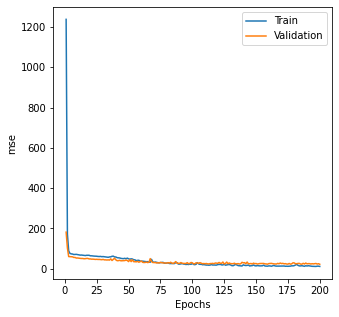

In [18]:
# loss와 val_loss의 그래프를 그린다

import matplotlib.pyplot as plt

def plot_loss_curve(total_epoch=10, start=1):
  plt.figure(figsize=(5, 5))
  plt.plot(range(start, total_epoch + 1),
           history.history['loss'][start-1:total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch + 1),
           history.history['val_loss'][start-1:total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()

plot_loss_curve(total_epoch=200, start=1)

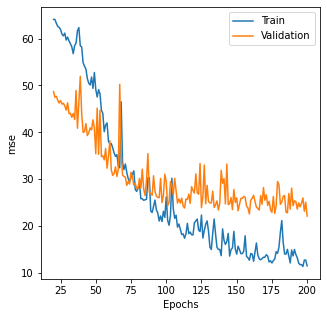

In [19]:
plot_loss_curve(total_epoch=200, start=20)

### 와인 품질 경진대회회

In [48]:
# 라이브러리
import pandas as pd
import numpy as np
import random 
import tensorflow as tf

# 랜덤 시드 고정
SEED = 12
random.seed(SEED)

In [49]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

print(train.shape, test.shape, submission.shape)

(5497, 14) (1000, 13) (1000, 2)


In [50]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [51]:
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [52]:
train['type'].value_counts()

white    4159
red      1338
Name: type, dtype: int64

In [53]:
train['type'] = np.where(train['type']=='white', 1, 0).astype(int)
test['type'] = np.where(test['type']=='white', 1, 0).astype(int)

train['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [54]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [55]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train.loc[:, 'quality'] - 3)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
# 피쳐 선택
X_train = train.loc[:, 'fixed acidity':]
x_test = test.loc[:, 'fixed acidity':]

# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_test_scaled.shape)

(5497, 12) (5497, 7)
(102, 13)


In [57]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(train_data, train_target):
  model = Sequential()
  model.add(Dense(128, activation='tanh', input_dim=train_data.shape[1]))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='tanh'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='tanh'))
  model.add(Dense(train_target.shape[1], activation='softmax'))

  model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['acc', 'mae'])

  return model

model = build_model(X_train_scaled, y_train)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               1664      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 7)                 231       
                                                                 
Total params: 12,231
Trainable params: 12,231
Non-trai

In [58]:
# Early Stopping 기법
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.15,
                                            shuffle=True, random_state=SEED)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_tr, y_tr, batch_size=64, epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/200
73/73 - 1s - loss: 1.3023 - acc: 0.4542 - mae: 0.1944 - val_loss: 1.1463 - val_acc: 0.5273 - val_mae: 0.1793 - 939ms/epoch - 13ms/step
Epoch 2/200
73/73 - 0s - loss: 1.1663 - acc: 0.5083 - mae: 0.1770 - val_loss: 1.0993 - val_acc: 0.5358 - val_mae: 0.1722 - 202ms/epoch - 3ms/step
Epoch 3/200
73/73 - 0s - loss: 1.1414 - acc: 0.5163 - mae: 0.1738 - val_loss: 1.0791 - val_acc: 0.5467 - val_mae: 0.1676 - 202ms/epoch - 3ms/step
Epoch 4/200
73/73 - 0s - loss: 1.1213 - acc: 0.5186 - mae: 0.1716 - val_loss: 1.1124 - val_acc: 0.5115 - val_mae: 0.1701 - 201ms/epoch - 3ms/step
Epoch 5/200
73/73 - 0s - loss: 1.1115 - acc: 0.5276 - mae: 0.1705 - val_loss: 1.0616 - val_acc: 0.5515 - val_mae: 0.1674 - 204ms/epoch - 3ms/step
Epoch 6/200
73/73 - 0s - loss: 1.1061 - acc: 0.5246 - mae: 0.1706 - val_loss: 1.0551 - val_acc: 0.5539 - val_mae: 0.1665 - 203ms/epoch - 3ms/step
Epoch 7/200
73/73 - 0s - loss: 1.0949 - acc: 0.5289 - mae: 0.1698 - val_loss: 1.0540 - val_acc: 0.5467 - val_mae: 0.1655 - 

In [59]:
model.evaluate(X_val, y_val)

26/26 [==============================] - 0s 2ms/step - loss: 1.0340 - acc: 0.5576 - mae: 0.1636


[1.0339981317520142, 0.5575757622718811, 0.16362665593624115]

In [60]:
# test 데이터에 대한 예측값 정리
y_pred_proba = model.predict(X_test_scaled)
y_pred_proba[:5]

ValueError: ignored

In [44]:
y_pred_label = np.argmax(y_pred_proba, axis=-1)+3
y_pred_label[:5]

array([5, 6, 6, 5, 6])

In [45]:
# 제출 양식에 맞게 정리
submission['quality'] = y_pred_label.astype(int)
submission.head()

ValueError: ignored